# Examine Distribution of Third Party Trackers

We wanted to analyze the relationship between a popularity of a website and the extent of trcking that occurred there.

In [2]:
#mount google drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## Import Files

In [3]:
import pandas as pd

##import results of tracking identification
ad_tracking_df = pd.read_csv('/content/drive/My Drive/IT_Security/Code and Data/ad_tracking_df_full.csv')
non_ad_tracking_df = pd.read_csv('/content/drive/My Drive/IT_Security/Code and Data/non_ad_tracking_df_second_try.csv')

print(ad_tracking_df[:5], "\n")
print(non_ad_tracking_df[:5])

print(len(ad_tracking_df))
print(len(non_ad_tracking_df))

   visit_id  ...      host_domain
0         1  ...  doubleclick.net
1         1  ...  doubleclick.net
2         5  ...  doubleclick.net
3         5  ...  doubleclick.net
4         5  ...  doubleclick.net

[5 rows x 4 columns] 

   visit_id  ...           host_domain
0         3  ...            demdex.net
1         5  ...               ioam.de
2         5  ...  google-analytics.com
3         5  ...               ioam.de
4         1  ...            criteo.net

[5 rows x 4 columns]
63024
57602


In [4]:
#adding column for tracking context
ad_tracking_df['tracking_context'] = "ad"
non_ad_tracking_df['tracking_context'] = "non_ad"

print(ad_tracking_df[:5], "\n")
print(non_ad_tracking_df[:5])

   visit_id  ... tracking_context
0         1  ...               ad
1         1  ...               ad
2         5  ...               ad
3         5  ...               ad
4         5  ...               ad

[5 rows x 5 columns] 

   visit_id  ... tracking_context
0         3  ...           non_ad
1         5  ...           non_ad
2         5  ...           non_ad
3         5  ...           non_ad
4         1  ...           non_ad

[5 rows x 5 columns]


In [5]:
#combine both dataframes
tracking_df = pd.concat([ad_tracking_df, non_ad_tracking_df])

print(tracking_df[:5])
print(len(tracking_df))
print(len(set(tracking_df.visit_id)))

   visit_id  ... tracking_context
0         1  ...               ad
1         1  ...               ad
2         5  ...               ad
3         5  ...               ad
4         5  ...               ad

[5 rows x 5 columns]
120626
7641


## Extract Tracking Domains for each visit id (i.e. each First-Party Website)

In [6]:
#create list of unique visit ids that have to be analyzed
visit_id_set_list = list(set(tracking_df.visit_id))
print(visit_id_set_list)
print("number of first party domains:", len(visit_id_set_list))

#create empty list to store final results
result_list = [[], []]

[1, 3, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 32, 33, 34, 35, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 57, 58, 59, 60, 61, 62, 63, 64, 66, 67, 68, 69, 70, 73, 75, 76, 78, 79, 80, 83, 84, 85, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 171, 172, 174, 175, 176, 177, 179, 180, 181, 182, 183, 184, 185, 186, 187, 189, 191, 192, 193, 194, 195, 197, 198, 199, 202, 204, 205, 206, 207, 208, 209, 210, 212, 214, 215, 216, 217, 218, 219, 221, 222, 223, 224, 225, 226, 227, 228, 229, 230, 231, 232, 233, 234, 235, 236, 237, 239, 240, 241, 242, 243, 244, 245, 246, 249, 250, 25

In [7]:
#identify tracking domains for each unique visit_id
for v_id in visit_id_set_list:
    
    #filter dataframe according to visit_id
    filtered_df = tracking_df[tracking_df.visit_id == v_id]
    
    #extract set of tracking host domains from filtered list
    tracking_domains = list(set(filtered_df.host_domain))
    
    #add visit_id to result_list
    result_list[0].append(v_id)

    #add identified tracking host domains to result_list
    result_list[1].append(tracking_domains)
    
print(result_list[0][:5])
print(result_list[1][:5])

[1, 3, 5, 6, 7]
[['bing.com', 'facebook.net', 'doubleclick.net', 'ioam.de', 'branch.io', 'criteo.net', 'scorecardresearch.com', 'licdn.com', 'google-analytics.com'], [nan, 'demdex.net'], ['googlesyndication.com', 'doubleclick.net', 'ioam.de', 'ampproject.org', 'google-analytics.com'], [nan, 'doubleclick.net', 'googletagmanager.com', 'google-analytics.com'], [nan, 'technical-service.net', 'adnxs.com', 'doubleclick.net', 'adalliance.io', 'ampproject.org', 'criteo.net', 'mxcdn.net', 'theadex.com', 'amazon-adsystem.com', 'google-analytics.com']]


In [8]:
#remove nan values from lists
cleaned_list = list()

for domain_list in result_list[1]:
    try:
        cleaned_list.append([item for item in domain_list if str(item) != 'nan'])
    except:
        pass

#result_list[1] = [remove_nan(item) for item in result_list[1]]

result_list[1] = cleaned_list

print(result_list[1][5])

['google-analytics.com', 'googletagmanager.com']


## Preparing Intervals for Analysis of Tracking Prevalence

In [9]:
#prepare dataframe
import numpy as np

#preparing dataframe
intervals_df = pd.DataFrame()

#setting columns with upper and lower bounds for groups of the distribution
intervals_df['lower_bound'] = np.arange(0, 10000, 100)
intervals_df['upper_bound'] = np.arange(100, 10001, 100)

#preparing empty index column for lists of indices for visit ids
intervals_df['idx'] = 0

intervals_df

,lower_bound,upper_bound,idx
0,0,100,0
1,100,200,0
2,200,300,0
3,300,400,0
4,400,500,0
...,...,...,...
95,9500,9600,0
96,9600,9700,0
97,9700,9800,0
98,9800,9900,0


## Extract Indices of visit ids for each Interval

In [10]:
#getting indices of site intervals
import numpy as np

print(result_list[0][:10])

#function to find indices that correspond to visit ids that are inside of predefined ranges
def find_idx(lower_bound, upper_bound):
    
    #list for identified indices
    idx_list = list()

    #check for each visit id whether it lies inbetween the two bounds
    for i in result_list[0]:
        if ((i > lower_bound) & (i <= upper_bound)):
            try:
                idx_list.append(result_list[0].index(i))
            except:
                pass

    return idx_list

[1, 3, 5, 6, 7, 8, 9, 10, 11, 12]


In [11]:
print(find_idx(0, 10))

[0, 1, 2, 3, 4, 5, 6, 7]


In [12]:
intervals_df['lower_bound'].loc[1]

100

In [13]:
#prepare list for indices of visit ids that correspond to predefined ranges
output_list = list()

#loop through all lower and upper bound (range) settings
for i in range(len(intervals_df)):

    #apply function with different bound settings
    result_set = find_idx(lower_bound = intervals_df['lower_bound'].loc[i], upper_bound = intervals_df['upper_bound'].loc[i])

    #add result to output list
    output_list.append(result_set)

print(output_list[:3])

print(len(intervals_df))
print(len(output_list))

[[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86], [87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175], [176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200, 201, 202, 203, 204, 205, 206, 207, 208, 209, 210, 211, 212, 213, 214, 215, 216, 217, 218, 219, 220,

In [14]:
#put results of visit id indices identification for different ranges into interval dataframe
intervals_df['idx'] = output_list
intervals_df

,lower_bound,upper_bound,idx
0,0,100,"[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,..."
1,100,200,"[87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 9..."
2,200,300,"[176, 177, 178, 179, 180, 181, 182, 183, 184, ..."
3,300,400,"[260, 261, 262, 263, 264, 265, 266, 267, 268, ..."
4,400,500,"[344, 345, 346, 347, 348, 349, 350, 351, 352, ..."
...,...,...,...
95,9500,9600,"[7301, 7302, 7303, 7304, 7305, 7306, 7307, 730..."
96,9600,9700,"[7366, 7367, 7368, 7369, 7370, 7371, 7372, 737..."
97,9700,9800,"[7436, 7437, 7438, 7439, 7440, 7441, 7442, 744..."
98,9800,9900,"[7505, 7506, 7507, 7508, 7509, 7510, 7511, 751..."


## Quantify Presence of Tracking Domains for each Interval

In [0]:
#count number of tracking occurrences for visit ids in different positional intervals
import itertools
from operator import itemgetter 

#function to concat visit ids for each range and then count number of tracking domains
def count_trackers(x):

    #access list elements at indices of range and concatenate them
    concat_range_domain_list = list(itertools.chain.from_iterable(itemgetter(*x)(result_list[1])))

    #calculate length of resulting concatenated list
    trackers_counter = len(concat_range_domain_list)

    return trackers_counter    

In [16]:
intervals_df['trackers_count'] = intervals_df.idx.apply(lambda x: count_trackers(x))

intervals_df

,lower_bound,upper_bound,idx,trackers_count
0,0,100,"[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...",579
1,100,200,"[87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 9...",609
2,200,300,"[176, 177, 178, 179, 180, 181, 182, 183, 184, ...",546
3,300,400,"[260, 261, 262, 263, 264, 265, 266, 267, 268, ...",506
4,400,500,"[344, 345, 346, 347, 348, 349, 350, 351, 352, ...",492
...,...,...,...,...
95,9500,9600,"[7301, 7302, 7303, 7304, 7305, 7306, 7307, 730...",208
96,9600,9700,"[7366, 7367, 7368, 7369, 7370, 7371, 7372, 737...",267
97,9700,9800,"[7436, 7437, 7438, 7439, 7440, 7441, 7442, 744...",218
98,9800,9900,"[7505, 7506, 7507, 7508, 7509, 7510, 7511, 751...",216


In [17]:
#example
from operator import itemgetter 
itemgetter(*[0,1,2,3,4,5,6,7])(result_list[1])

(['bing.com',
  'facebook.net',
  'doubleclick.net',
  'ioam.de',
  'branch.io',
  'criteo.net',
  'scorecardresearch.com',
  'licdn.com',
  'google-analytics.com'],
 ['demdex.net'],
 ['googlesyndication.com',
  'doubleclick.net',
  'ioam.de',
  'ampproject.org',
  'google-analytics.com'],
 ['doubleclick.net', 'googletagmanager.com', 'google-analytics.com'],
 ['technical-service.net',
  'adnxs.com',
  'doubleclick.net',
  'adalliance.io',
  'ampproject.org',
  'criteo.net',
  'mxcdn.net',
  'theadex.com',
  'amazon-adsystem.com',
  'google-analytics.com'],
 ['google-analytics.com', 'googletagmanager.com'],
 ['tribalfusion.com', 'doubleclick.net', 'google-analytics.com'],
 ['doubleclick.net',
  'pepper.com',
  'google-analytics.com',
  'visualwebsiteoptimizer.com',
  'facebook.net'])

## Plotting Number of Tracking Domains Across Intervals

### Simple Line Plot

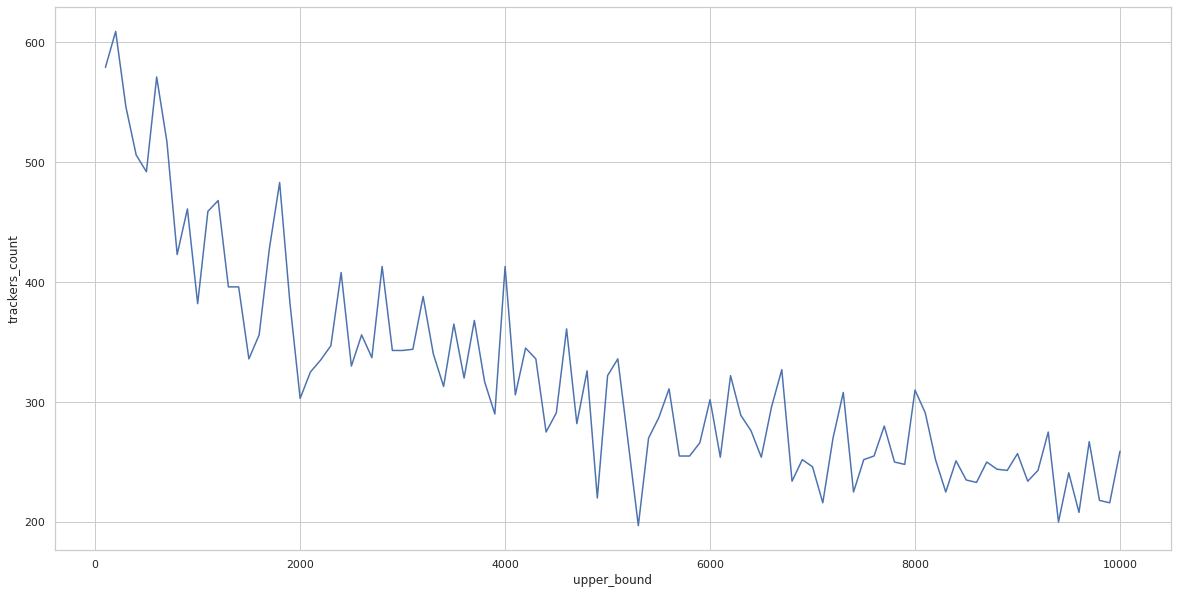

In [18]:
#plot distribution of trackers according to position
import seaborn as sns; sns.set()
import matplotlib.pyplot as plt
%matplotlib inline


sns.set(rc={'figure.figsize':(20,10)})
sns.set_style("whitegrid")
ax = sns.lineplot(x="upper_bound", y="trackers_count", data=intervals_df)

### Scatter Plot

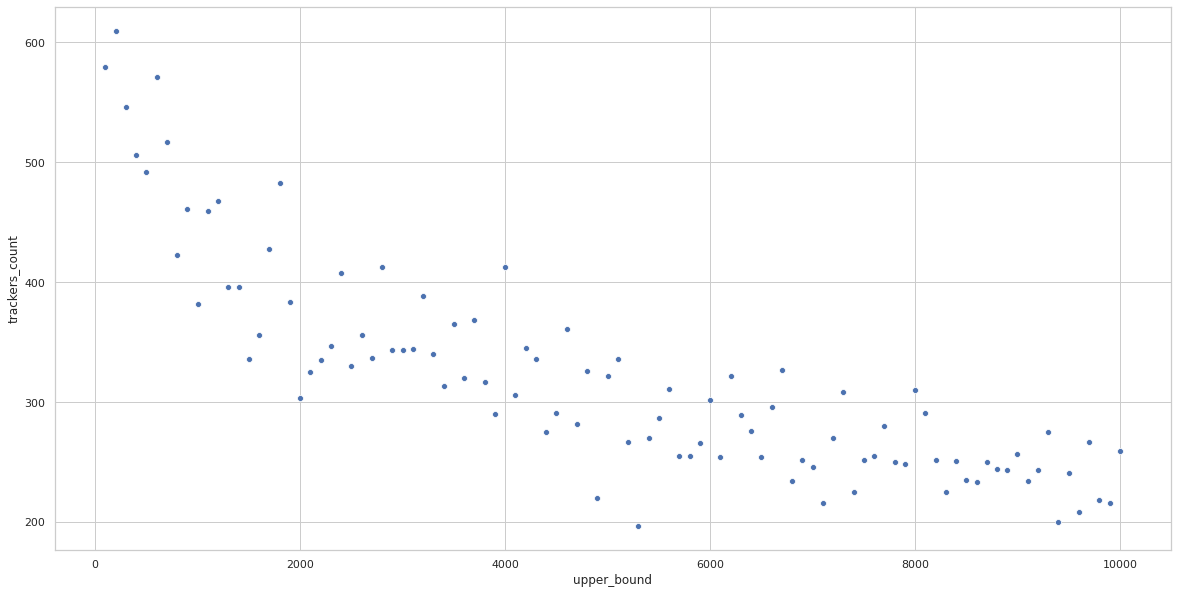

In [19]:
sns.set_style("whitegrid")
ax = sns.scatterplot(x="upper_bound", y="trackers_count", data=intervals_df)

### Scatter Plot with Fitted Curve

Text(7.825000000000003, 0.5, 'Accumulated Number of Trackers per Interval')

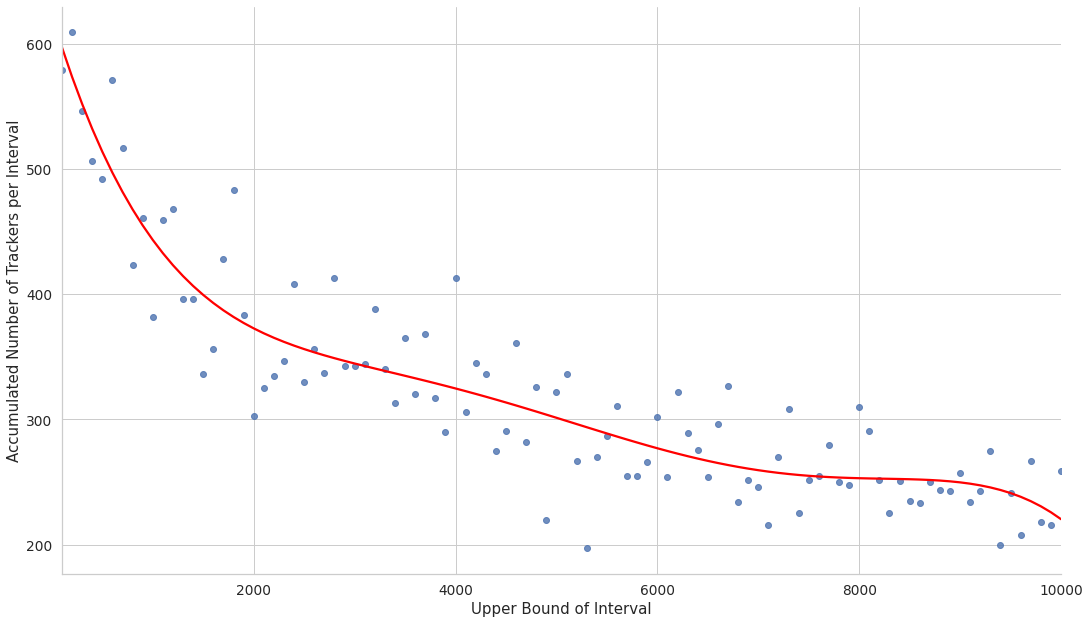

In [20]:
sns.set(font_scale = 1.25)
sns.set_style("whitegrid")

smothed_line_plot = sns.lmplot(x="upper_bound", y="trackers_count", data=intervals_df, ci=None, order=5, truncate=True, line_kws={'color': 'red'})
smothed_line_plot.fig.set_figwidth(20)
smothed_line_plot.fig.set_figheight(10)

plt.xlabel('Upper Bound of Interval', fontsize=15)
plt.ylabel('Accumulated Number of Trackers per Interval', fontsize=15)

In [0]:
fig = smothed_line_plot
fig.savefig("tracker_distribution.pdf", bbox_inches='tight')

## Analyze Distribution of the Number of Trackers on Individual First Party Level

### Count Number of First Parties for each visit id

In [22]:
print(result_list[0][:5])
print(result_list[1][:5])

#construct dataframe with visit ids
visit_id_tracker_count = pd.DataFrame(result_list[0], columns = ['visit_id'])

#ading lists of trackers to dataframe
visit_id_tracker_count['tracking_domains'] = result_list[1]

#count number of trackers for each visit id
visit_id_tracker_count['tracker_count'] = visit_id_tracker_count.tracking_domains.apply(lambda x: len(x))

visit_id_tracker_count[:5]

[1, 3, 5, 6, 7]
[['bing.com', 'facebook.net', 'doubleclick.net', 'ioam.de', 'branch.io', 'criteo.net', 'scorecardresearch.com', 'licdn.com', 'google-analytics.com'], ['demdex.net'], ['googlesyndication.com', 'doubleclick.net', 'ioam.de', 'ampproject.org', 'google-analytics.com'], ['doubleclick.net', 'googletagmanager.com', 'google-analytics.com'], ['technical-service.net', 'adnxs.com', 'doubleclick.net', 'adalliance.io', 'ampproject.org', 'criteo.net', 'mxcdn.net', 'theadex.com', 'amazon-adsystem.com', 'google-analytics.com']]


,visit_id,tracking_domains,tracker_count
0,1,"[bing.com, facebook.net, doubleclick.net, ioam...",9
1,3,[demdex.net],1
2,5,"[googlesyndication.com, doubleclick.net, ioam....",5
3,6,"[doubleclick.net, googletagmanager.com, google...",3
4,7,"[technical-service.net, adnxs.com, doubleclick...",10


### Compute Descriptive Statistics

In [23]:
#summary statistics
visit_id_tracker_count.tracker_count.describe()

count    7641.00000
mean        4.20246
std         3.86943
min         0.00000
25%         1.00000
50%         3.00000
75%         6.00000
max        30.00000
Name: tracker_count, dtype: float64

### Plot Overall Distribution of Visit IDs per WEbsite

Text(0, 0.5, '')

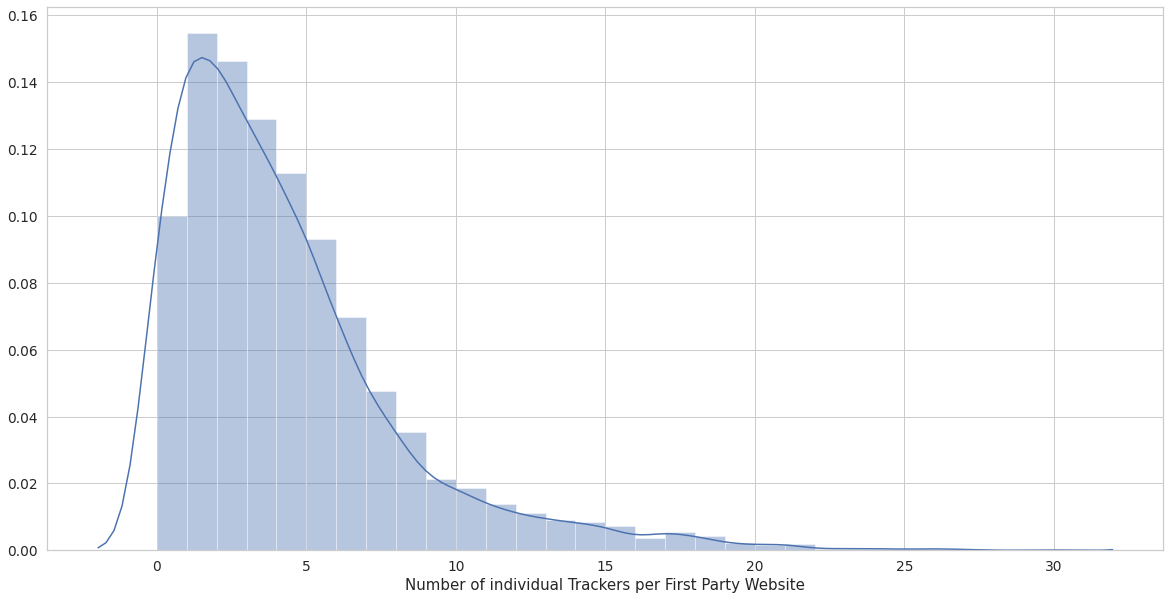

In [24]:
#plot distributions of trackers per visit_id
import seaborn as sns; sns.set()
import matplotlib.pyplot as plt
%matplotlib inline


sns.set(rc={'figure.figsize':(20,10)})
sns.set(font_scale = 1.25)
sns.set_style("whitegrid")

plot = sns.distplot(visit_id_tracker_count.tracker_count, kde=True, rug=False, bins=30)

plt.xlabel('Number of individual Trackers per First Party Website', fontsize=15)
plt.ylabel('', fontsize=15)

In [0]:
fig = plot.get_figure()
fig.savefig("tracker_per_site_hist.pdf", bbox_inches='tight')

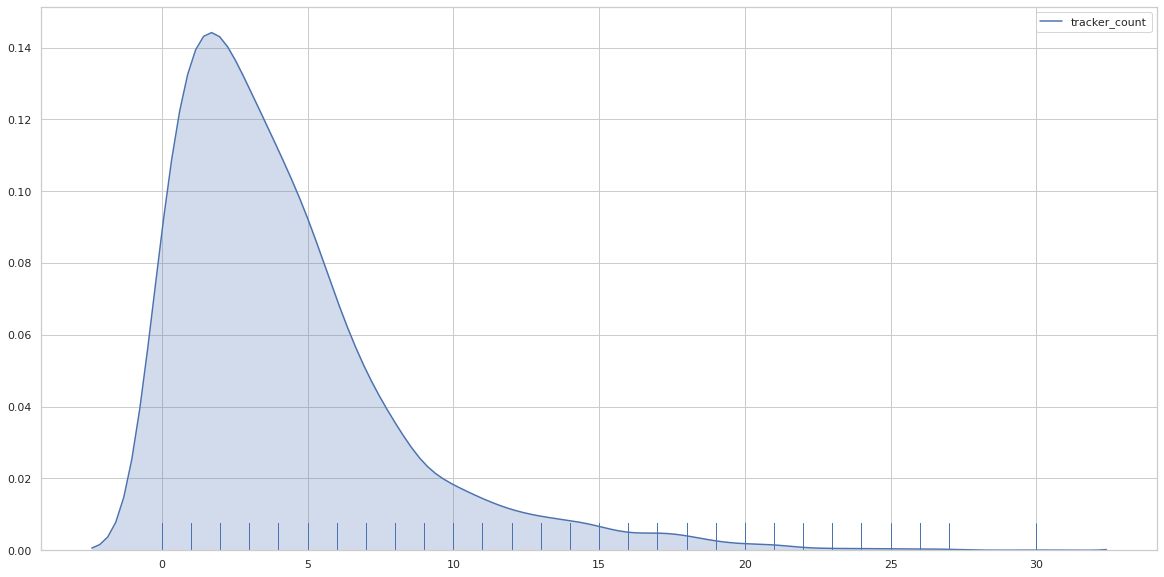

In [26]:
sns.set(rc={'figure.figsize':(20,10)})
sns.set_style("whitegrid")

sns.kdeplot(visit_id_tracker_count.tracker_count, shade=True, bw=0.8)
sns.rugplot(visit_id_tracker_count.tracker_count);

### Further Analysis of Trackers per Website

#### Max Number of Trackers for Individual Website

In [27]:
#finding maximum number of trackers per visit id
max_trackers = list(visit_id_tracker_count.visit_id[visit_id_tracker_count.tracker_count == max(visit_id_tracker_count.tracker_count)])
print(max_trackers)

print(list(set(ad_tracking_df.top_level_url[ad_tracking_df.visit_id == max_trackers[0]])))

[2610]
['https://www.sprueche-und-wuensche.de/']


In [28]:
print(list(visit_id_tracker_count.tracking_domains[visit_id_tracker_count.tracker_count == max(visit_id_tracker_count.tracker_count)]))

print("max number of trackers per site:", len(list(visit_id_tracker_count.tracking_domains[visit_id_tracker_count.tracker_count == max(visit_id_tracker_count.tracker_count)])[0]))

[['dyntrk.com', 'brandwire.tv', 'adtech.de', 'taboola.com', 'conative.de', 'adform.net', '2mdn.net', 'criteo.net', 'imasdk.googleapis.com', 'adition.com', 'amazon-adsystem.com', 'vgwort.de', 'advertising.com', 'yahoo.com', 'pubmatic.com', 'plista.com', 'pippio.com', 'googlesyndication.com', 'dailymotion.com', 'jwpltx.com', 'google-analytics.com', 'adnxs.com', 'quantserve.com', 'googletagmanager.com', 'dmxleo.com', 'doubleclick.net', 'storage.googleapis.com', 'adtiger.de', 'ampproject.org', 'smartadserver.com']]
max number of trackers per site: 30
